# 3. Análisis de los datos

José Luis Aguilera Luzania

## Contenido

**3.1 Introducción**

- ¿Qué es la detección de noticias falsas? (*Fake news*)
- Objetivo de la libreta

**3.2 Análisis de los datos**

- Librerías
- Datos adicionales para la librería `nltk`
- Conjunto de datos
- Información del conjunto de datos
- ¿Los datos están balanceados?
- ¿Cuáles son las fuentes?
- ¿Cuál es la cantidad de noticias según el tema?
- ¿Cuál es la cantidad de noticias según el tema y categoría?

**3.3 Word cloud**

- Palabras vacías o *Stopwords* en español
- Función para generar *word clouds*
- Generación de *word clouds* como un análisis del texto

## 3.1 Introducción

**¿Qué es la detección de noticias falsas? (*Fake News*)**
La detección de noticias falsas (Fake News) es la tarea de evaluar la veracidad de las afirmaciones en las noticias. Este es un problema crítico en el Procesamiento del Lenguaje Natural (PLN) porque tanto en medios de noticias tradicionales como en medios digitales las Fake News generan un gran impacto social y político en cada individuo. Por ejemplo, la exposición a las Fake News puede generar actitudes de ineficacia, alienación y cinismo hacia ciertos candidatos políticos (Balmas, 2014).

**Objetivo de la libreta**
El objetivo de esta libreta es conocer mejor los datos, no solo su estructura, también su comportamiento y características para decidir que puede ser útil al momento de resolver el problema de clasificar las noticias.

## 3.2 Análisis de los datos

**Librerías**

Manipulación de datos:
- `pandas`: Librería para manipular los datos de forma tabular.
- `cmd`: Librería para controlar el formato de impresión en la consola.

Procesamiento del lenguaje natural:
- `nltk`: Librería para utilizar técnicas de procesamiento del lenguaje natural.

Representación de los datos:
- `wordcloud`: Librería para generar una nube de palabras y guardarla como imagen *.png*.

In [1]:
import pandas as pd
import cmd
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

**Datos adicionales para la librería `nltk`**

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JoseLuis_AL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Conjunto de datos**

El conjunto de datos se encuentra en el archivo *datos.csv*.

In [3]:
df_datos = pd.read_csv('Datos/datos.csv')

**Información del conjunto de datos**

In [4]:
# Información del dataframe.
print(f'Noticias, Columnas: {df_datos.shape}')
print(f'Columnas: {list(df_datos.columns)}')
print('Noticias verdaderas: {}'.format(df_datos.groupby('categoria').size()[0]))
print('Noticias falsas: {}'    .format(df_datos.groupby('categoria').size()[1]))

# Primeros elementos del dataframe.
df_datos.head()

Noticias, Columnas: (971, 5)
Columnas: ['categoria', 'tema', 'fuente', 'encabezado', 'texto']
Noticias verdaderas: 480
Noticias falsas: 491


,categoria,tema,fuente,encabezado,texto
0,0,educación,el ruinaversal,rae incluira la palabra lady en el diccionario...,rae incluira la palabra lady en el diccionario...
1,0,educación,hay noticia,la palabra haiga aceptada por la rae,la palabra haiga aceptada por la rae la real a...
2,0,educación,el ruinaversal,yordi rosado escribira y disenara los nuevos l...,yordi rosado escribira y disenara los nuevos l...
3,1,educación,el universal,unam capacitara a maestros para aprobar prueba...,unam capacitara a maestros para aprobar prueba...
4,0,educación,lamula,pretenden aprobar libros escolares con conteni...,alerta pretenden aprobar libros escolares con ...


**¿Los datos están balanceados?**

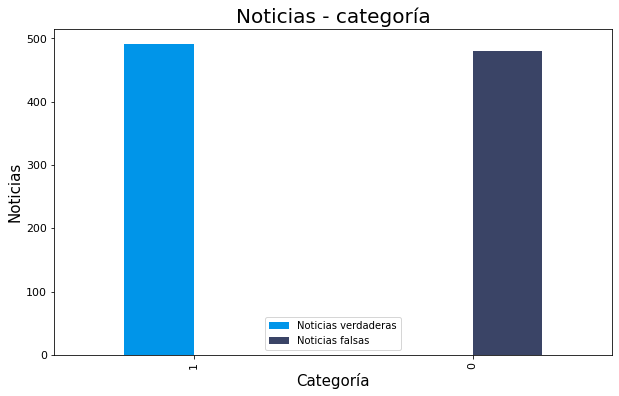

In [5]:
# Colores.
color_verdaderas = '#0095e9'
color_falsas = '#3a4466'

# Separar el número de noticias verdaderas.
df_categoria_verdadera = df_datos[df_datos['categoria'] == 1]
df_categoria_verdadera = pd.DataFrame.from_dict(
    dict(df_categoria_verdadera.groupby('categoria').size()),
    orient='index',
    columns=['Noticias verdaderas'])

# Separar el número de noticias falsas.
df_categoria_falsa = df_datos[df_datos['categoria'] == 0]
df_categoria_falsa = pd.DataFrame.from_dict(
    dict(df_categoria_falsa.groupby('categoria').size()),
    orient='index',
    columns=['Noticias falsas'])

# Unir las noticias verdaderas y las noticias falsas.
df_categoria = pd.concat([df_categoria_verdadera, df_categoria_falsa], axis=1)

# Plot.
categorias_plot = df_categoria.plot(kind='bar', figsize=(10, 6), fontsize=11, color=[color_verdaderas, color_falsas])
categorias_plot.set_title('Noticias - categoría', fontsize=20)
categorias_plot.set_xlabel('Categoría', fontsize=15)
categorias_plot.set_ylabel('Noticias', fontsize=15)
categorias_plot.figure.savefig('Plots/Noticias-Caregoría.png')

Los datos se encuentran balanceados respecto a la categoría como se describió en libreta "*1. Introducción a los datos*" porque se recolectó un par Verdadera-Falsa en cada evento.

**¿Cuáles son las fuentes?**

Para intentar obtener las fuentes se realizan estos pasos:
1. Obtener todos los valores de la columna *fuente*.
2. Eliminar todas las fuentes repetidas.
3. Imprimir las fuentes.

In [6]:
# Paso 1.
fuentes_ls = df_datos['fuente'].to_list()

# Paso 2.
fuentes_ls = list(sorted(set(fuentes_ls)))

# Paso 3.
cli = cmd.Cmd()
cli.columnize(fuentes_ls, displaywidth=110)

20 minutos                 el economista            hola mexico            opinion                
abc                        el espectador            http www2 esmas com    pan tweet              
abc el recreo              el financiero            huffpost               parabolica             
abc noticias               el grafico               inciclopedia           people en espanol      
abc sociedad               el heraldo               info bae               playgroundmag          
actualidad rt              el librero de gutenberg  jornada                proceso                
alerta digital             el manana                konbini                publimetro             
animal politico            el manana global         la jornada             quien                  
anonymous azteca           el milenio               la nacion              radio formula          
argumento politico         el mundo                 la neta virtual        razon                  
aristegui 

**¿Cuál es la cantidad de noticias según el tema?**

El conjunto de datos cuenta con 9 temas, para observar como se encuentran distribuidas las noticias según el tema es necesario hacer lo siguiente:

1. Contar todas las noticias y separarlas en un nuevo *dataframe*.
2. Graficar el nuevo *dataframe* utilizando un diagrama de barras.

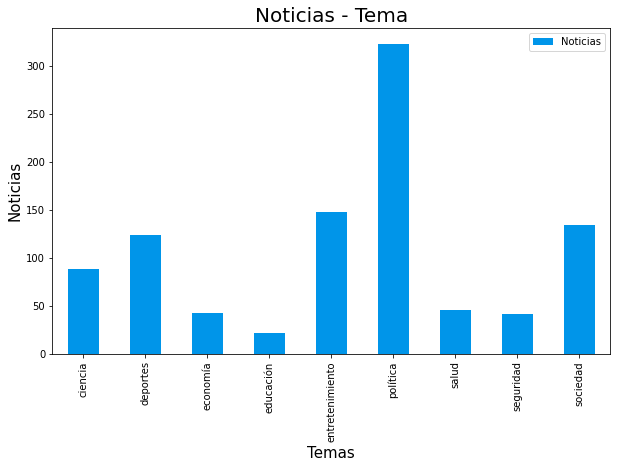

In [7]:
# Paso 1.
df_datos_temas = pd.DataFrame.from_dict(
    dict(df_datos.groupby('tema').size()),
    orient='index',
    columns=['Noticias'])

# Paso 2.
color = '#0095e9'

temas_plot = df_datos_temas.plot(kind='bar', figsize=(10, 6), fontsize=10, color=[color])
temas_plot.set_title('Noticias - Tema', fontsize=20)
temas_plot.set_xlabel('Temas', fontsize=15)
temas_plot.set_ylabel('Noticias', fontsize=15)
temas_plot.figure.savefig('Plots/Noticias-Temas.png')

In [8]:
df_noticias_temas = df_datos['tema'].value_counts()
df_noticias_temas

política           323
entretenimiento    148
sociedad           134
deportes           124
ciencia             89
salud               46
economía            43
seguridad           42
educación           22
Name: tema, dtype: int64

**¿Cuál es la cantidad de noticias según el tema y la categoría?**

Para obtener la cantidad de las noticias falsas y verdaderas se deben seguir los siguientes pasos:

1. Separar las noticias con categoría verdadera.
2. Generar un diccionario de las noticias agrupadas por tema.
3. Generar un *dataframe* a partir del diccionario.
4. Repetir los tres pasos anteriores para la categoría de noticias falsas.
5. Unir los dos *dataframe* resultantes.
6. Graficar el *dataframe* resultado.

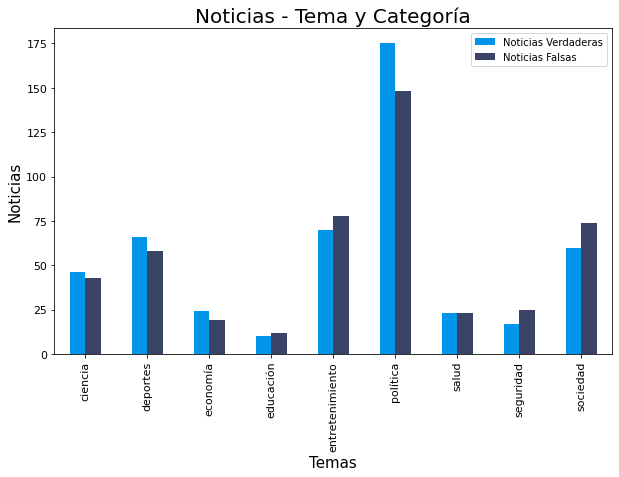

In [9]:
# CATEGORÍA: VERDADERAS.
# Paso 1, 2 y 3.
df_verdaderas = df_datos[df_datos['categoria'] == 1]
df_verdaderas = pd.DataFrame.from_dict(
    dict(df_verdaderas.groupby('tema').size()),
    orient='index',
    columns=['Noticias Verdaderas'])

# CATEGORÍA: FALSAS.
# Paso 1, 2 y 3.
df_falsas = df_datos[df_datos['categoria'] == 0]
df_falsas = pd.DataFrame.from_dict(
    dict(df_falsas.groupby('tema').size()),
    orient='index',
    columns=['Noticias Falsas'])

# Paso 5.
df_total_noticias = pd.concat([df_verdaderas, df_falsas], axis=1)

# Paso 6.
color_verdaderas = '#0095e9'
color_falsas = '#3a4466'

total_noticias_plot = df_total_noticias.plot(kind='bar', figsize=(10, 6), fontsize=11, color=[color_verdaderas, color_falsas])
total_noticias_plot.set_title('Noticias - Tema y Categoría', fontsize=20)
total_noticias_plot.set_xlabel('Temas', fontsize=15)
total_noticias_plot.set_ylabel('Noticias', fontsize=15)
total_noticias_plot.figure.savefig('Plots/Noticias-Temas-Categoria.png')

**El sesgo de los datos**

Como se observa en la gráfica anterior, la cantidad de noticias sobre política es mayor a la cantidad de los otros temas, esto implica que nuestros modelos serán mejor clasificando noticias sobre política que de cualquier otro tema.


## 3.3 Word Cloud

*Word Cloud* es una representación visual de las palabras que forman un texto, donde el tamaño es mayor para las palabras que aparecen con más frecuencia.

**Palabras vacías o *stopwords* en español**

Las *stopwords* o palabras vacías son aquellas que carecen de sentido de manera individual o sin una palabra clave o *keyword*. Algunos ejemplos son: el, la, ellos, ustedes, para, ser, etc.

Se utilizan las *stopwords* proporcionadas por la librería `nltk` en conjunto con las obtenidas del repositorio "stopwords-es" del usuario [genediazjr](https://github.com/stopwords-iso/stopwords-es)

In [10]:
# Obtener las stopwords.
stopwords_spanish_nltk = stopwords.words('spanish')
stopwords_spanish_json = list(pd.read_json('Datos/stopwords-es.json')[0])

# Se concatenan las stopwords, se crea un set para eliminar repetidos y sé genera una lista.
stopwords_spanish = list(set(stopwords_spanish_nltk+stopwords_spanish_json))

# Se agrega la stopword 'NUMBER', debido a que no aporta nada a los datos para el análisis.
stopwords_spanish.append('number')

**Función para generar *word clouds***

In [11]:
def generar_word_cloud(datos, nombre_archivo, stopwords_ls=None, categoria='todas', tema='todas'):
    """
    Input:
        datos: DataFrame que contiene las noticias.
        categoria: Categoría a utilizar para los datos (True o Fake).
        tema: Tema de las noticias.
        nombre_archivo: nombre del archivo donde se guardará la nube de palabras.
    """

    # Guardamos las noticias según la categoría.
    df = datos if categoria == 'todas' else datos[datos['categoria'] == categoria]

    # Guardamos las noticias según el tema.
    if tema != 'todas': df = df[df['tema'] == tema]

    # Removemos las columnas que no son necesarias.
    df = df[['texto']]

    # Imprimiremos la información de los datos utilizados.
    categoria_str = 'verdaderas' if categoria == 1 else 'falsas'
    print(f'NOTICIAS [{tema.upper()}] {categoria_str.upper()}: {df.shape[0]}')

    # Generamos una lista con todos los textos.
    news_ls = [w for w in df['texto']]

    # Generamos un objeto str con la lista de textos (concatenamos los textos).
    news_str = ' '.join(news_ls)

    # Crear un tokenizer que separe solo las palabras.
    tokenizer = nltk.RegexpTokenizer(r'\w+')

    # Tokenizar las palabras.
    words = tokenizer.tokenize(news_str)

    # Eliminar las stopwords.
    if stopwords_ls is None:
        stopwords_ls = []

    words_content = [w for w in words if w.lower() not in stopwords_ls]

    # Obtener la frequencia de las palabras de contenido sin las stopwords.
    words_content_freq = nltk.FreqDist(words_content)
    words_content_freq_dict = dict(words_content_freq)

    # Crear el word cloud.
    word_cloud = WordCloud(collocations = False, background_color = 'white', width=1000, height=1000).fit_words(words_content_freq_dict)

    # Guardarlo en un archivo.
    word_cloud.to_file(nombre_archivo)

    return None

**Generación de *word clouds* como un análisis del texto**

In [12]:
word_cloud_dir = 'Word-Cloud/'
verdaderas = 1
falsas = 0

# Word Cloud de todas las noticias.
generar_word_cloud(df_datos, word_cloud_dir + 'wc_verdaderas.png', stopwords_spanish, verdaderas, 'todas')
generar_word_cloud(df_datos, word_cloud_dir + 'wc_falsas.png', stopwords_spanish, falsas, 'todas')

# Word Cloud de las noticias de entretenimiento.
generar_word_cloud(df_datos, word_cloud_dir + 'wc_verdaderas_entretenimiento.png', stopwords_spanish, verdaderas, 'entretenimiento')
generar_word_cloud(df_datos, word_cloud_dir + 'wc_falsas_entretenimiento.png', stopwords_spanish, falsas, 'entretenimiento')

# Word Cloud de las noticias de salud.
generar_word_cloud(df_datos, word_cloud_dir + 'wc_verdaderas_salud.png', stopwords_spanish, verdaderas, 'salud')
generar_word_cloud(df_datos, word_cloud_dir + 'wc_falsas_salud.png', stopwords_spanish, falsas, 'salud')

NOTICIAS [TODAS] VERDADERAS: 491
NOTICIAS [TODAS] FALSAS: 480
NOTICIAS [ENTRETENIMIENTO] VERDADERAS: 70
NOTICIAS [ENTRETENIMIENTO] FALSAS: 78
NOTICIAS [SALUD] VERDADERAS: 23
NOTICIAS [SALUD] FALSAS: 23


***Word cloud* de todas las noticias verdaderas**
<img src="Word-Cloud/wc_verdaderas.png" class="center" width="300" height="300">

***Word cloud* de todas las noticias falsas**
<img src="Word-Cloud/wc_falsas.png" class="center" width="300" height="300">

***Word cloud* de todas las noticias verdaderas de entretenimiento**
<img src="Word-Cloud/wc_verdaderas_entretenimiento.png" class="center" width="300" height="300">

***Word cloud* de todas las noticias falsas de salud**
<img src="Word-Cloud/wc_falsas_salud.png" class="center" width="300" height="300">